# Linear Regression Tutorial


Author: Andrew Andrade ([andrew@andrewandrade.ca](mailto:andrew@andrewandrade.ca))

This is part one of a series of tutorials related to [regression](http://datascienceguide.github.io/regression/) used in data science.  The cooresponding notes can be found [here](http://datascienceguide.github.io/regression/).

In this tutorial, We will first learn to fit a simple line using Least Squares Linear Regression (LSLR), plot residuals, residual distribution, statistics approach to linear regression, horizontal residuals and end with total least squares linear regression.

## Fitting a line using LSLR

First let us import the necessary libraries and read the data file.  You can follow along by downloading the dataset from here: TODO.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from math import log
from sklearn import linear_model

#comment below if not using ipython notebook
%matplotlib inline



Now lets read the first set of data, take a look at the dataset and make a simple scatter plot.

In [2]:
#read csv
anscombe_i = pd.read_csv('../datasets/anscombe_i.csv')
anscombe_i

,x,y
0,10,8.04
1,8,6.95
2,13,7.58
3,9,8.81
4,11,8.33
5,14,9.96
6,6,7.24
7,4,4.26
8,12,10.84
9,7,4.82


/usr/lib/pymodules/python2.7/matplotlib/collections.py:548: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


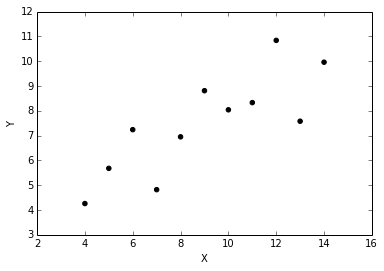

In [3]:
plt.scatter(anscombe_i.x, anscombe_i.y,  color='black')
plt.ylabel("Y")
plt.xlabel("X")


Luckly for us, we do not need to implement linear regression, since scikit learn already has a very efficient implementation.  The straight line can be seen in the plot below, showing how linear regression attempts to draw a straight line that will best minimize the residual sum of squares between the observed responses in the dataset, and the responses predicted by the linear approximation.

The coefficients, the residual sum of squares and the variance score are also calculated.

Note: from reading the [documentation](http://scikit-learn.org/stable/modules/linear_model.html#ordinary-least-squares) this method computes the least squares solution using a singular value decomposition of X. If X is a matrix of size (n, p) this method has a cost of O($n p^2$), assuming that $n \geq p$.  A more efficient alternative (for large number of features) is to use Stochastic Gradient Descent or another method outlined in the [linear models documentation](http://scikit-learn.org/stable/modules/linear_model.html) 


If you do not know what BigO is, please read the background information from the notes (or take a algorithms course).


('Coefficients: \n', array([[ 0.50009091]]))
Residual sum of squares: 1.25
Variance score: 0.67


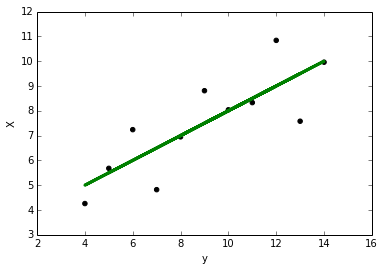

In [4]:
regr_i = linear_model.LinearRegression()

#We need to reshape the data to be a matrix
# with only one column
X = anscombe_i.x.reshape((len(anscombe_i.x), 1))
y = anscombe_i.y.reshape((len(anscombe_i.y), 1))

#Fit a line 
regr_i.fit(X,y)

# The coefficients
print('Coefficients: \n', regr_i.coef_)

# The mean square error
print("Residual sum of squares: %.2f"
      % np.mean((regr_i.predict(X) - y) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr_i.score(X, y))

plt.plot(X,regr_i.predict(X), color='green',
         linewidth=3)

plt.scatter(anscombe_i.x, anscombe_i.y,  color='black')

plt.ylabel("X")
plt.xlabel("y")



## Residuals

From the notes, we learnt that we use ordinary linear regression when y is dependant on x since the algorithm reduces the vertical residual (y_observed - y predicted).  The figure below outlines this using a different method for linear regression (using a polyfit with 1 polynomial).

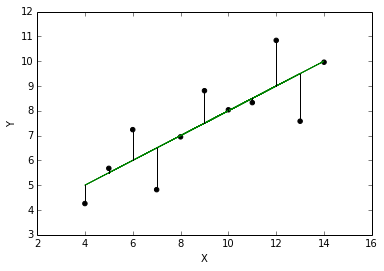

In [5]:
from pylab import *

# determine the line-fit
k,d = polyfit(anscombe_i.x,y,1)
yfit = k*anscombe_i.x+d

# plot the data
figure(1)
scatter(anscombe_i.x,y, color='black')

plot(anscombe_i.x, yfit, 'green')

#plot line from point to regression line
for ii in range(len(X)):
    plot([anscombe_i.x[ii], anscombe_i.x[ii]], [yfit[ii], y[ii]], 'k')
    
xlabel('X')
ylabel('Y')

Now let us plot the residual (y - y predicted) vs x.

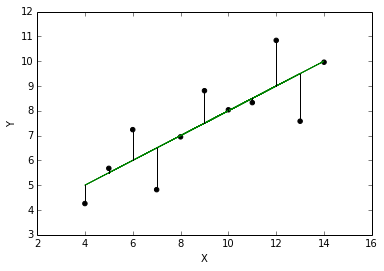

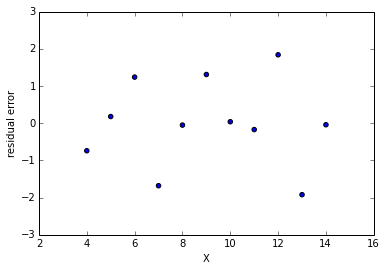

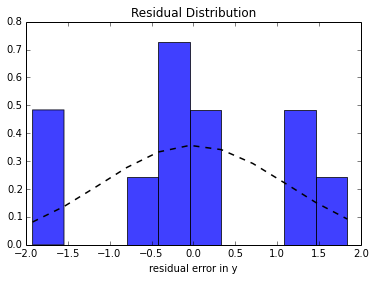

In [6]:
import pylab as P
figure(1)
scatter(anscombe_i.x,y, color='black')

plot(anscombe_i.x, yfit, 'green')

#plot line from point to regression line
for ii in range(len(X)):
    plot([anscombe_i.x[ii], anscombe_i.x[ii]], [yfit[ii], y[ii]], 'k')
    
xlabel('X')
ylabel('Y')

residual_error= anscombe_i.y - yfit
error_mean = np.mean(residual_error)
error_sigma = np.std(residual_error)


plt.figure(2)

plt.scatter(anscombe_i.x,residual_error,label='residual error')
plt.xlabel("X")
plt.ylabel("residual error")

plt.figure(3)

n, bins, patches = plt.hist(residual_error, 10, normed=1, facecolor='blue', alpha=0.75)
y_pdf = P.normpdf( bins, error_mean, error_sigma)
l = P.plot(bins, y_pdf, 'k--', linewidth=1.5)

plt.xlabel("residual error in y")
plt.title("Residual Distribution")



As seen the the histogram, the residual error should be (somewhat) normally distributed and centered around zero.  This [post](http://stattrek.com/regression/linear-regression.aspx#ReqressionPrerequisites) explains why.

If the residuals are not randomly distributed around zero, consider applying a transform to the data or applying non-linear regression.  In addition to looking at the residuals, one could use the statsmodels library to take a [statistical approach to ordinary least squares regression.](http://www.datarobot.com/blog/ordinary-least-squares-in-python/)


In [7]:
# load statsmodels as alias ``sm``
import statsmodels.api as sm

y = anscombe_i.y
X = anscombe_i.x
# Adds a constant term to the predictor
# y = mx +b
X = sm.add_constant(X)  

#fit ordinary least squares
est = sm.OLS(y, X)
est = est.fit()

est.summary()

/usr/lib/python2.7/dist-packages/scipy/stats/stats.py:1293: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.667
Model:                            OLS   Adj. R-squared:                  0.629
Method:                 Least Squares   F-statistic:                     17.99
Date:                Sat, 02 Jan 2016   Prob (F-statistic):            0.00217
Time:                        08:53:16   Log-Likelihood:                -16.841
No. Observations:                  11   AIC:                             37.68
Df Residuals:                       9   BIC:                             38.48
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          3.0001      1.125      2.667      0.026         0.456     5.544
x              0.5001      0.118      4.241      0.002         0.233     0.767
==============================================================================
Omnibus:                        0.082   Durbin-Watson:                   3.212
Prob(Omnibus):                  0.960   Jarque-Bera (JB):                0.289
Skew:                          -0.122   Prob(JB):                        0.865
Kurtosis:                       2.244   Cond. No.                         29.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The important parts of the summary are the:

- R-squared (or [coefficeient of determination](https://en.wikipedia.org/wiki/Coefficient_of_determination) which is the statistical measure of how well the regression line approximates the real data points.

- Adj. R-squared (adjusted based on the number of observations and the degrees-of-freedom of the residuals)

- P > |t| which is the P-value that the null-hypothesis that the coefficient = 0 is true. If it is less than the confidence level, often 0.05, it indicates that there is a statistically significant relationship between the term and the response.

- [95.0% Conf. Interval] The lower and upper values. See [here](http://stattrek.com/regression/slope-confidence-interval.aspx?Tutorial=AP) for more details

If these measures do make make sense to you, consider learning or revising statistics.  http://onlinestatbook.com or http://stattrek.com/tutorials/ap-statistics-tutorial.aspx are great free resources which outlines all the necessary background to be a great statstician and data scientist.  Both http://onlinestatbook.com/2/regression/inferential.html, and  http://stattrek.com/regression/slope-confidence-interval.aspx?Tutorial=AP provide the specifics of confidence intervals for linear regression

We can now plot the fitted line to the data and observe the same results as the previous two methods for linear regression.



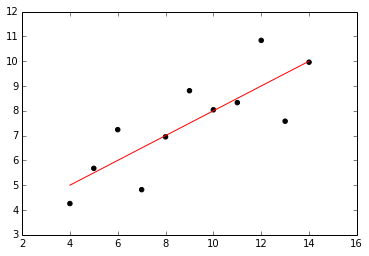

In [8]:
plt.scatter(anscombe_i.x, anscombe_i.y,  color='black')
X_prime = np.linspace(min(anscombe_i.x), max(anscombe_i.x), 100)[:, np.newaxis]

# add constant as we did before
X_prime = sm.add_constant(X_prime)  
y_hat = est.predict(X_prime)

# Add the regression line (provides same as above)
plt.plot(X_prime[:, 1], y_hat, 'r')  

If we want to be even more fancier, we can use the [seaborn library](http://stanford.edu/~mwaskom/software/seaborn/examples/regression_marginals.html) to plot Linear regression with [marginal distributions](https://en.wikipedia.org/wiki/Marginal_distribution) which also states the pearsonr and p value on the plot.  Using the statsmodels approach is more rigourous, but sns provides quick visualizations.

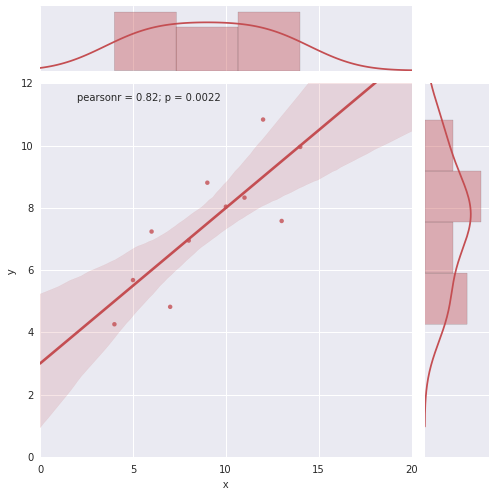

In [9]:
import seaborn as sns
#this just makes the plots pretty (in my opion)
sns.set(style="darkgrid", color_codes=True)

g = sns.jointplot("x", "y", data=anscombe_i, kind="reg",
                  xlim=(0, 20), ylim=(0, 12), color="r", size=7)


Usually we calculate the (vertical) residual, or the difference in the observed and predicted in the y.  This is because "the use of the least squares method to calculate the best-fitting line through a two-dimensional scatter plot typically requires the user to assume that one of the variables depends on the other.  (We caculate the difference in the y)  However, in many cases the relationship between the two variables is more complex, and it is not valid to say that one variable is independent and the other is dependent. When analysing such data researchers should  consider plotting the three regression lines that can be calculated for any two-dimensional scatter plot."

## Regression using Horizontal Residual

If X is dependant on y, then the regression line can be made based on horizontal residuals as shown below.

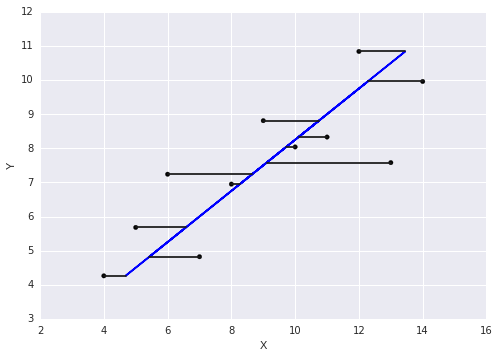

In [10]:
X = anscombe_i.x.reshape((len(anscombe_i.x), 1))
y = anscombe_i.y.reshape((len(anscombe_i.y), 1))


k,d = polyfit(anscombe_i.y,anscombe_i.x,1)
xfit = k*y+d
figure(2)
# plot the data
scatter(anscombe_i.x,y, color='black')
plot(xfit, y, 'blue')
for ii in range(len(y)):
    plot([xfit[ii], anscombe_i.x[ii]], [y[ii], y[ii]], 'k')
xlabel('X')
ylabel('Y')

## Total Least Squares Regression

Finally, a line of best fit can be made using [Total least squares regression](https://en.wikipedia.org/wiki/Total_least_squares), a least squares data modeling technique in which observational errors on both dependent and independent variables are taken into account.  This is done by minizing the errors perpendicular to the line, rather than just vertically.  It is more complicated to implement than standard linear regression, but there is Fortran code called ODRPACK that has this efficiently implemented and wrapped scipy.odr Python module (which can be used out of the box).  The details of odr are in the [Scipy documentation](http://docs.scipy.org/doc/scipy/reference/odr.html) and in even more detail in the [ODRPACK guide](http://docs.scipy.org/doc/external/odrpack_guide.pdf).

In the code below (inspired from [here](http://blog.rtwilson.com/orthogonal-distance-regression-in-python/) uses an inital guess for the parameters, and makes a fit using total least squares regression.


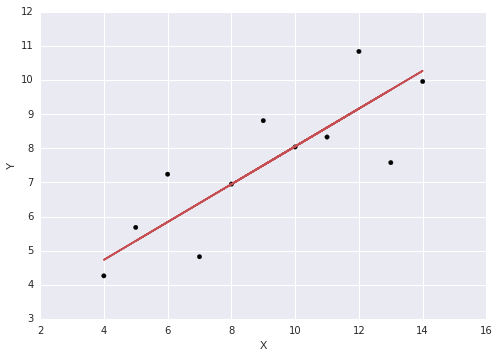

In [11]:
from scipy.odr import Model, Data, ODR
from scipy.stats import linregress
import numpy as np

def orthoregress(x, y):
    # get initial guess by first running linear regression
    linregression = linregress(x, y)
    
    model = Model(fit_function)
    
    data = Data(x, y)
    
    od = ODR(data, model, beta0=linregression[0:2])
    out = od.run()
    
    return list(out.beta)

def fit_function(p, x):
    #return y = m x + b
    return (p[0] * x) + p[1]

m, b = orthoregress(anscombe_i.x, anscombe_i.y)

# determine the line-fit
y_ortho_fit = m*anscombe_i.x+b
# plot the data
scatter(anscombe_i.x,anscombe_i.y, color = 'black')
plot(anscombe_i.x, y_ortho_fit, 'r')
xlabel('X')
ylabel('Y')


Plotting all three regression lines gives a fuller picture of the data, and comparing their slopes provides a simple graphical assessment of the correlation coefficient. Plotting the orthogonal regression line (red) provides additional information because it makes no assumptions about the dependence or independence of the variables; as such, it appears to more accurately describe the trend in the data compared to either of the ordinary least squares regression lines.

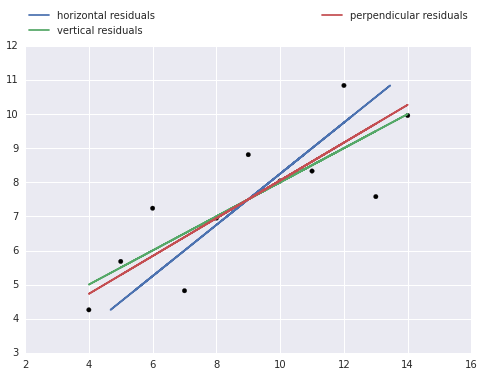

In [12]:

scatter(anscombe_i.x,anscombe_i.y,color = 'black')
plot(xfit, anscombe_i.y, 'b', label= "horizontal residuals")
plot(anscombe_i.x, yfit, 'g', label= "vertical residuals")
plot(anscombe_i.x, y_ortho_fit, 'r', label = "perpendicular residuals" )
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=2, mode="expand", borderaxespad=0.)



## Key takeaways:

1. Know the asumptions for using linear regression and ensure they are met.
2. Do not blindly apply simple linear regression, understand when to use horizonal residuals (X is dependant on y) or total least squares regression.
3. Understand the statistical significance of linear regression

## Optional Further reading:

Chapter 2 (Linear regression) of [Introduction to Statistical Learning](http://www-bcf.usc.edu/~gareth/ISL/)

Appendix D Regression of  [Introduction to Data Mining ](http://www-users.cs.umn.edu/~kumar/dmbook/index.php)

Linear models of [Data Mining](http://www.cs.waikato.ac.nz/ml/weka/book.html)

Video (for using WEKA): [Linear regression](https://www.youtube.com/watch?v=6tDnNyNZDF0)

### Scikit Learn documentation:

[Linear models](http://scikit-learn.org/stable/modules/linear_model.html)


## Homework

Now that you have seen an examples of regression using a simple linear models, see if you can predict the price of a house given the size of property from the log_regression_example.csv (found in [../datasets/log_regression_example.csv](https://github.com/datascienceguide/datascienceguide.github.io/raw/master/datasets/log_regression_example.csv)  If you are unable to fit a simple linear model, try transforming variables to achieve linearity outlined in class or  [here](http://stattrek.com/regression/linear-transformation.aspx?Tutorial=AP)

Hint: look at the log and power transform

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=b338d4a7-f3d7-4d35-a605-8b6537173411' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>